[View in Colaboratory](https://colab.research.google.com/github/VedSengupta/MACHINE-LEARNING-PYTHON-R/blob/master/DSC_DAY3.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [63]:
#to upload files in colab
from google.colab import files
files.upload()

{}

In [64]:
fruits=pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [65]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [66]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


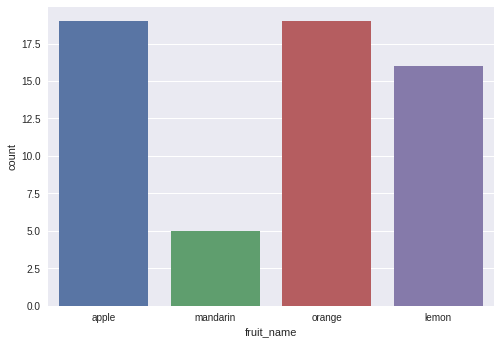

In [67]:
import seaborn as sns
sns.countplot(fruits['fruit_name'])
plt.show()

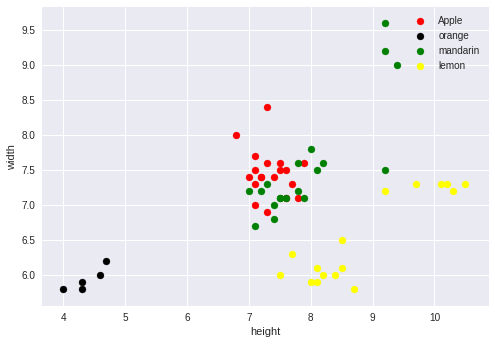

In [68]:
y=fruits['fruit_label']
X=fruits.iloc[:,3:]
plt.scatter(X[y==1]['height'],X[y==1]['width'],label='Apple',c='red')
plt.scatter(X[y==2]['height'],X[y==2]['width'],label='orange',c='black')
plt.scatter(X[y==3]['height'],X[y==3]['width'],label='mandarin',c='green')
plt.scatter(X[y==4]['height'],X[y==4]['width'],label='lemon',c='yellow')
plt.xlabel('height')
plt.ylabel('width')
plt.legend()
plt.show()



In [0]:
feature_names=['mass','width','height','color_score']
X=fruits[feature_names]
y=fruits['fruit_label']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print("Accuracy : ",logreg.score(X_train,y_train))
print("Accuracy : ",logreg.score(X_test,y_test))

Accuracy :  0.5909090909090909
Accuracy :  0.4666666666666667


In [82]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,y_train)
print("Accuracy",clf.score(X_train,y_train))
print("Accuracy",clf.score(X_test,y_test))

Accuracy 1.0
Accuracy 0.7333333333333333


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy",knn.score(X_train,y_train))
print("Accuracy",knn.score(X_test,y_test))

Accuracy 1.0
Accuracy 1.0


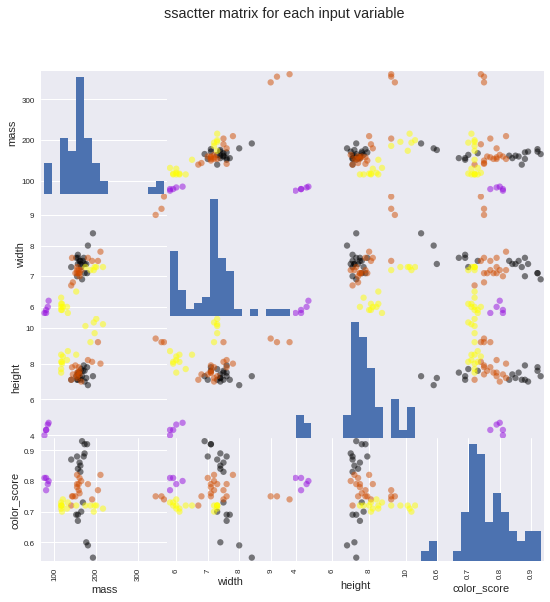

In [88]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(X,c=y,marker='o',s=40,

                                   hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)
plt.suptitle("ssactter matrix for each input variable")
plt.show()

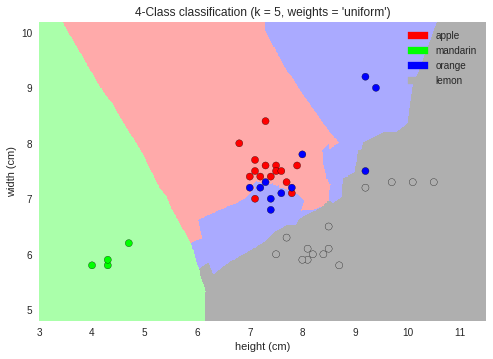

In [89]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import numpy as np

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))    
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')

perceptron and neural network also
Classification using neural network


In [94]:
import numpy as np
from sklearn import datasets
import pandas as pd
from pandas import DataFrame as df
iris=datasets.load_iris()
X=iris.data
y=iris.target
X=np.insert(X,X.shape[1],y,axis=1)
data=pd.DataFrame(X)

data=data.reindex(np.random.permutation(data.index))
data.head()

,0,1,2,3,4
40,5.0,3.5,1.3,0.3,0.0
61,5.9,3.0,4.2,1.5,1.0
116,6.5,3.0,5.5,1.8,2.0
32,5.2,4.1,1.5,0.1,0.0
35,5.0,3.2,1.2,0.2,0.0


In [104]:
features=data.iloc[:,:4]
target=data.iloc[:,4]

target=target.values.reshape((target.shape[0],1))
target_class=np.zeros(shape=(target.shape[0],3))
for i in range (target.shape[0]):
  if target[i]==0:
    target_class[i][0]=1
  elif target[i]==1:
    target_class[i][1]=1
  else:
    target_class[i][2]=1

print(target_class.shape)

(150, 3)


In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def der_sigmoid(x):
  return(sigmoid(x)*(1-sigmoid(x)))

input_nodes=features.shape[1]
output_nodes=3

weight_matrix=np.random.uniform(size=(input_nodes,output_nodes))
epoch=1000
lr=0.02

In [0]:
for i in range(epoch):
  output_node_input=features.dot(weight_matrix)
  output=sigmoid(output_node_input)
  
  error=target_class-output
  drv=der_sigmoid(output_node_input)
  delta_weight=error*drv
  
  weight_matrix=weight_matrix+lr*features.T.dot(delta_weight)
  

In [121]:
final_output=np.array(output)
#print(final_output)
output_class=np.zeros(shape=final_output.shape[0])

for i in range(final_output.shape[0]):
  output_class[i]=np.argmax(final_output[i])
print(output_class)
class_diff=output_class - target[:,0]
  

[0. 1. 2. 0. 0. 1. 2. 0. 2. 0. 1. 1. 0. 0. 2. 0. 1. 2. 0. 1. 2. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 2. 0. 0. 2. 2. 1. 1. 2. 2. 0. 2. 2. 2. 0.
 2. 1. 1. 2. 1. 1. 0. 2. 1. 0. 0. 2. 1. 1. 2. 2. 0. 1. 1. 2. 0. 1. 2. 2.
 1. 2. 0. 1. 1. 0. 1. 2. 0. 2. 0. 1. 2. 1. 1. 0. 0. 0. 2. 2. 2. 0. 0. 1.
 1. 2. 2. 2. 1. 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 1.
 2. 1. 0. 0. 0. 2. 1. 2. 2. 0. 1. 2. 2. 0. 0. 1. 2. 0. 0. 1. 1. 2. 1. 2.
 1. 2. 0. 2. 1. 1.]


In [127]:
print('Actual calss:')
print(target[:,0])
print(">>>>>>>>>>>>>>>>>>>>>>>>")
print('predicted class')
print(output_class)


wrong_prediction=np.count_nonzero(class_diff)
N=len(class_diff)
#print('class_diff')
simple_accuracy=100*(N-wrong_prediction)/N
print("Accuracy :- "+str(simple_accuracy)+'%')

Actual calss:
[0. 1. 2. 0. 0. 2. 2. 0. 2. 0. 1. 1. 0. 0. 2. 0. 1. 2. 0. 1. 2. 1. 1. 0.
 2. 1. 0. 0. 1. 1. 0. 1. 1. 0. 2. 0. 0. 2. 2. 1. 1. 2. 2. 0. 2. 2. 2. 0.
 2. 1. 1. 2. 1. 1. 0. 2. 1. 0. 0. 2. 1. 1. 2. 2. 0. 1. 2. 2. 0. 1. 2. 2.
 2. 2. 0. 1. 1. 0. 2. 2. 0. 2. 0. 1. 2. 1. 1. 0. 0. 0. 2. 2. 2. 0. 0. 1.
 1. 2. 2. 2. 1. 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 0. 1. 1. 1. 2. 1. 0. 0. 1.
 2. 1. 0. 0. 0. 2. 1. 1. 2. 0. 1. 1. 2. 0. 0. 1. 2. 0. 0. 1. 1. 2. 1. 2.
 2. 2. 0. 2. 1. 1.]
>>>>>>>>>>>>>>>>>>>>>>>>
predicted class
[0. 1. 2. 0. 0. 1. 2. 0. 2. 0. 1. 1. 0. 0. 2. 0. 1. 2. 0. 1. 2. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 2. 0. 0. 2. 2. 1. 1. 2. 2. 0. 2. 2. 2. 0.
 2. 1. 1. 2. 1. 1. 0. 2. 1. 0. 0. 2. 1. 1. 2. 2. 0. 1. 1. 2. 0. 1. 2. 2.
 1. 2. 0. 1. 1. 0. 1. 2. 0. 2. 0. 1. 2. 1. 1. 0. 0. 0. 2. 2. 2. 0. 0. 1.
 1. 2. 2. 2. 1. 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 1.
 2. 1. 0. 0. 0. 2. 1. 2. 2. 0. 1. 2. 2. 0. 0. 1. 2. 0. 0. 1. 1. 2. 1. 2.
 1. 2. 0. 2. 1. 1.]
Accuracy :- 93.33333333333333